In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,RidgeCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

## Explore the data

In [2]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [3]:
oscars_df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
oscars_df.head()

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,Awards,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_William Shakespeare,Writer_Woody Allen
0,tt0091763,Platoon,English,USA,120,R,92.0,6.000000e+06,Orion Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0082979,Reds,English,USA,195,PG,76.0,3.200000e+07,Paramount Pictures,Best Actor in a Leading Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0084434,An Officer and a Gentleman,English,USA,124,R,75.0,7.500000e+06,Paramount Pictures,Best Actor in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0119360,In & Out,English,USA,90,PG-13,70.0,3.500000e+07,Paramount Pictures,Best Actress in a Supporting Role,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0292542,Son of the Bride,Spanish,Argentina,123,R,68.0,1.193676e+07,Sony Pictures Classics,Best Foreign Language Film,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1136, 90)

In [6]:
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
oscars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 90 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   runtime (mins)                            1136 non-null   int64  
 1   metacritic score                          1136 non-null   float64
 2   budget                                    1136 non-null   float64
 3   Total_Noms                                1136 non-null   int64  
 4   Avg_Award_Score                           1136 non-null   float64
 5   Awards_Best Actor in a Leading Role       1136 non-null   float64
 6   Awards_Best Actor in a Supporting Role    1136 non-null   float64
 7   Awards_Best Actress in a Leading Role     1136 non-null   float64
 8   Awards_Best Art Direction-Set Decoration  1136 non-null   float64
 9   Awards_Best Cinematography                1136 non-null   float64
 10  Awards_Best Director                

In [8]:
oscars_data.corr()

,runtime (mins),metacritic score,budget,Total_Noms,Avg_Award_Score,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_William Shakespeare,Writer_Woody Allen
runtime (mins),1.000000,-0.019315,0.232852,0.355896,0.086005,0.132043,0.078923,0.005028,0.086136,0.033169,...,0.008801,-0.013792,0.069414,0.023093,0.102951,-0.039734,-0.002133,0.130759,0.050338,-0.111100
metacritic score,-0.019315,1.000000,-0.162162,0.327954,0.472480,0.080313,0.025476,-0.013267,-0.042860,-0.028671,...,0.010307,0.037558,-0.002373,-0.044491,0.069278,0.067315,0.013893,0.023753,-0.038758,0.017157
budget,0.232852,-0.162162,1.000000,0.075834,-0.067099,-0.088107,-0.072769,-0.062702,-0.011142,-0.025102,...,0.008509,-0.012749,0.130560,0.028710,-0.015470,-0.040794,-0.014180,0.019643,-0.019337,-0.051488
Total_Noms,0.355896,0.327954,0.075834,1.000000,0.289615,0.237237,0.119842,0.046157,0.046992,0.026253,...,-0.002622,0.024378,0.075626,0.014534,0.041133,-0.037707,0.007038,0.073881,-0.003975,-0.016481
Avg_Award_Score,0.086005,0.472480,-0.067099,0.289615,1.000000,0.000609,-0.040072,-0.135779,-0.059536,0.003636,...,0.017800,0.074944,0.025704,-0.030239,0.039079,0.011020,0.035135,0.054628,-0.023608,0.023463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writer_Pedro Almodóvar,-0.039734,0.067315,-0.040794,-0.037707,0.011020,-0.021441,-0.017929,-0.016908,-0.012200,-0.008672,...,-0.004845,-0.005942,-0.004421,-0.005235,-0.004421,1.000000,-0.003952,-0.004845,-0.003952,-0.006870
Writer_Peter Morgan,-0.002133,0.013893,-0.014180,0.007038,0.035135,-0.019169,-0.016029,-0.015116,-0.010907,-0.007753,...,-0.004332,-0.005312,-0.003952,-0.004681,-0.003952,-0.003952,1.000000,-0.004332,-0.003534,-0.006142
Writer_Quentin Tarantino,0.130759,0.023753,0.019643,0.073881,0.054628,0.018081,0.028665,-0.018530,-0.013370,-0.009504,...,-0.005310,-0.006512,-0.004845,-0.005738,-0.004845,-0.004845,-0.004332,1.000000,-0.004332,-0.007529
Writer_William Shakespeare,0.050338,-0.038758,-0.019337,-0.003975,-0.023608,0.031709,-0.016029,-0.015116,0.156531,-0.007753,...,-0.004332,-0.005312,-0.003952,-0.004681,-0.003952,-0.003952,-0.003534,-0.004332,1.000000,-0.006142


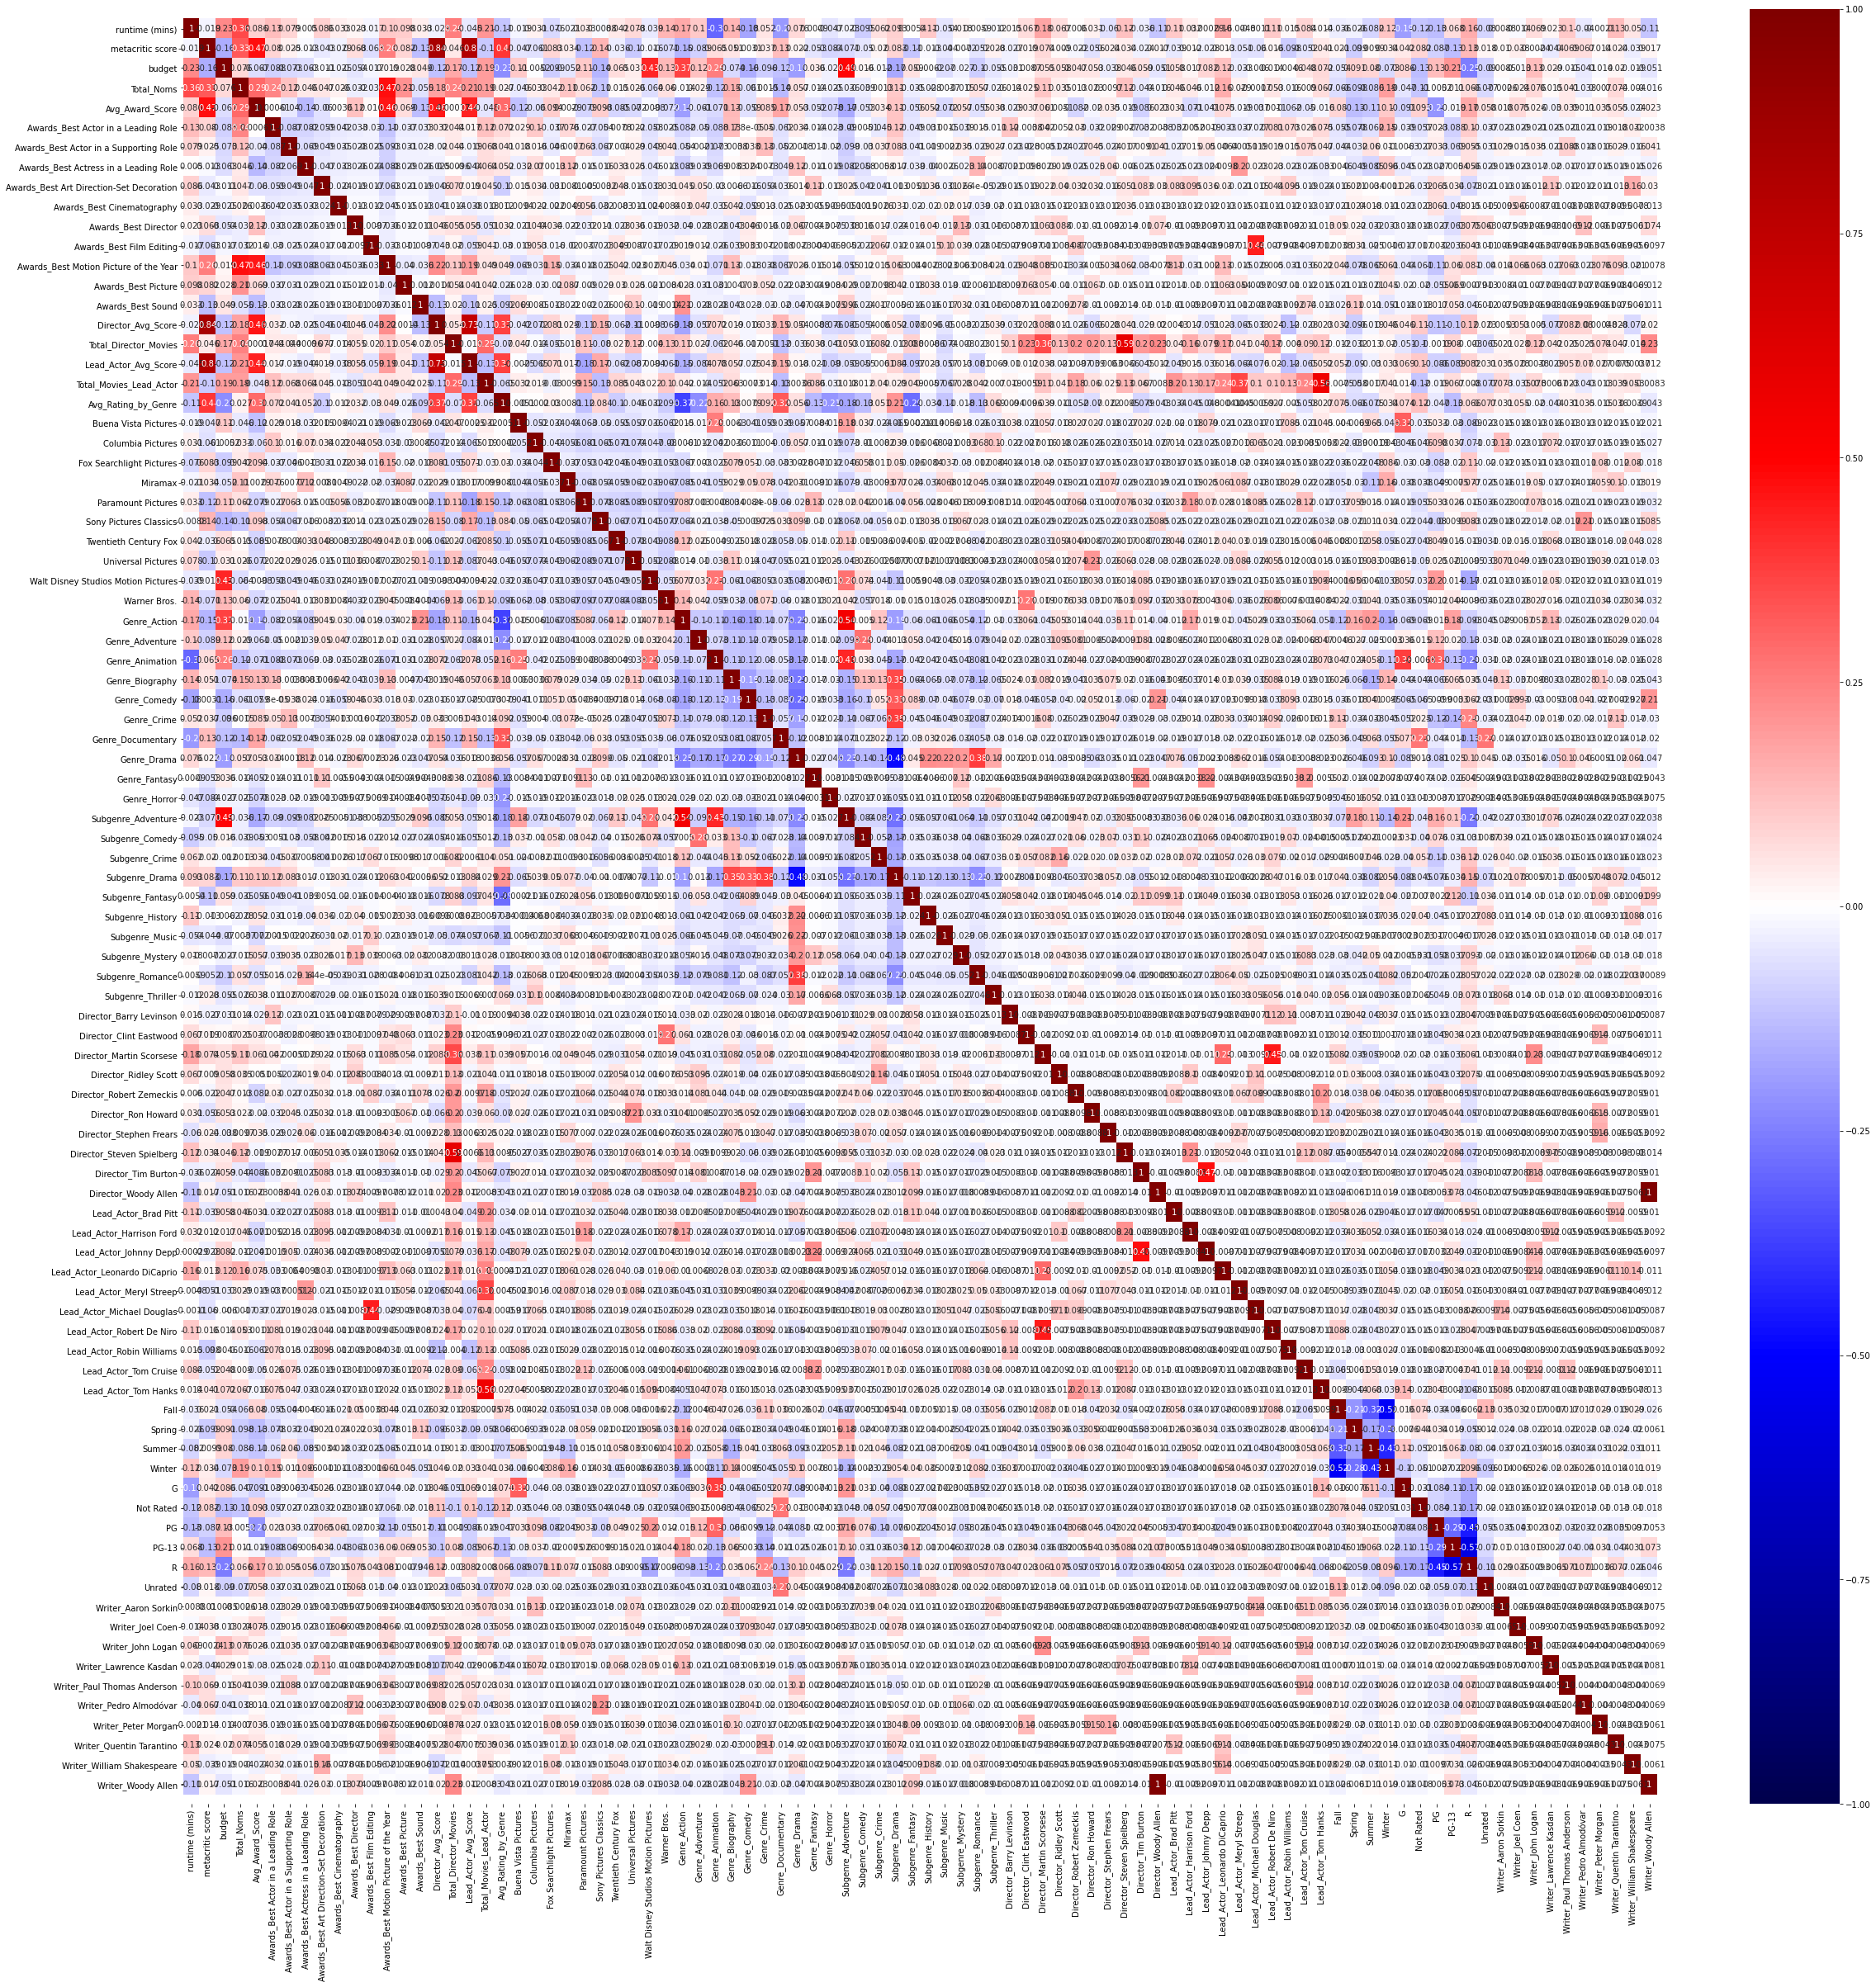

In [9]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(oscars_data.corr())+0.5, -0.5);

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(model.predict(), model.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

NameError: name 'model' is not defined

<Figure size 720x504 with 0 Axes>

## Split into test sets

In [10]:
X = oscars_data.drop(columns=['metacritic score'])
y = oscars_data['metacritic score']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [12]:
X_train.describe()

,runtime (mins),budget,Total_Noms,Avg_Award_Score,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,Awards_Best Director,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_William Shakespeare,Writer_Woody Allen
count,908.000000,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,120.633260,4.096697e+07,2.889868,75.720575,0.085903,0.064978,0.064978,0.033040,0.016520,0.009912,...,0.006608,0.009912,0.002203,0.005507,0.004405,0.005507,0.002203,0.006608,0.002203,0.012115
std,22.232035,5.076025e+07,2.632799,4.831326,0.280375,0.246623,0.246623,0.178839,0.127534,0.099118,...,0.081065,0.099118,0.046906,0.074043,0.066262,0.074043,0.046906,0.081065,0.046906,0.109458
min,70.000000,0.000000e+00,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105.000000,1.000000e+07,1.000000,73.186275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118.000000,2.300000e+07,2.000000,75.769912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,132.000000,5.000000e+07,4.000000,78.828571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,224.000000,3.210000e+08,14.000000,86.111111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_test.describe()

,runtime (mins),budget,Total_Noms,Avg_Award_Score,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,Awards_Best Director,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_William Shakespeare,Writer_Woody Allen
count,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.0,228.0,228.000000,228.000000,228.000000,228.0,228.000000,228.0,228.000000,228.000000
mean,117.640351,3.851139e+07,3.092105,75.921005,0.127193,0.078947,0.043860,0.030702,0.017544,0.013158,...,0.0,0.0,0.013158,0.008772,0.004386,0.0,0.008772,0.0,0.008772,0.004386
std,19.950656,4.795065e+07,2.952685,4.801383,0.333922,0.270250,0.205233,0.172888,0.131575,0.114201,...,0.0,0.0,0.114201,0.093452,0.066227,0.0,0.093452,0.0,0.093452,0.066227
min,75.000000,0.000000e+00,1.000000,64.229167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,102.000000,7.741882e+06,1.000000,73.186275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,116.000000,2.200000e+07,2.000000,75.769912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,130.000000,4.725000e+07,4.000000,78.871795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,188.000000,3.000000e+08,16.000000,86.111111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


## Scale Numerical Features

In [14]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [15]:
scale = StandardScaler().fit(X_train_scale)
X_train_scale = scale.transform(X_train_scale)
X_test_scale = scale.transform(X_test_scale)

## Do a simple linear regression model on data

In [16]:
lm = LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [17]:
y_pred = lm.predict(X_test_scale)

In [18]:
list(zip(oscars_data.drop(columns='metacritic score'),lm.coef_))

[('runtime (mins)', -0.28951482835717124),
 ('budget', -1.1054964816651642),
 ('Total_Noms', 2.642340267701697),
 ('Avg_Award_Score', 0.6021407389935054),
 ('Awards_Best Actor in a Leading Role', 0.22161108330465495),
 ('Awards_Best Actor in a Supporting Role', 0.2934459178583473),
 ('Awards_Best Actress in a Leading Role', 0.33791702368815474),
 ('Awards_Best Art Direction-Set Decoration', -0.36128987445141414),
 ('Awards_Best Cinematography', -0.060895661831100956),
 ('Awards_Best Director', 0.2025446722943931),
 ('Awards_Best Film Editing', -0.3747167259056752),
 ('Awards_Best Motion Picture of the Year', -0.48441804367972496),
 ('Awards_Best Picture', 0.5881166220119951),
 ('Awards_Best Sound', -0.08777158059291512),
 ('Director_Avg_Score', 7.300967764068805),
 ('Total_Director_Movies', -0.40840405173245486),
 ('Lead_Actor_Avg_Score', 4.676760258282238),
 ('Total_Movies_Lead_Actor', -0.1700948072751487),
 ('Avg_Rating_by_Genre', 0.6784958433753784),
 ('Buena Vista Pictures', -0.085

In [19]:
lm.intercept_

71.41628729649621

In [20]:
lm.score(X_train_scale,y_train)

0.8402927501918056

In [21]:
lm.score(X_test_scale,y_test)

0.7614682316559473

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     50.23
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          2.16e-271
Time:                        12:21:05   Log-Likelihood:                -2834.6
No. Observations:                 908   AIC:                             5843.
Df Residuals:                     821   BIC:                             6262.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.192    372.754      0.000      71.040      71.792
x1            -0.2894      0.267     -1.085      0.278      -0.813       0.234
x2            -1.1055      0.291     -3.800      0.000      -1.677      -0.535
x3             2.6422      0.308      8.587      0.000       2.038       3.246
x4             0.6021      0.280      2.149      0.032       0.052       1.152
x5             0.2215      0.238      0.929      0.353      -0.246       0.689
x6             0.2935      0.221      1.330      0.184      -0.140       0.727
x7             0.3379      0.220      1.539      0.124      -0.093       0.769
x8            -0.3613      0.216     -1.671      0.095      -0.786       0.063
x9            -0.0609      0.203     -0.299      0.765      -0.460       0.338
x10            0.2025      0.210      0.966      0.334      -0.209       0.614
x11           -0.3748      0.227     -1.652      0.099      -0.820       0.071
x12           -0.4843      0.287     -1.685      0.092      -1.048       0.080
x13            0.5882      0.215      2.733      0.006       0.166       1.011
x14           -0.0876      0.208     -0.421      0.674      -0.496       0.321
x15            7.3010      0.313     23.343      0.000       6.687       7.915
x16           -0.4087      0.547     -0.747      0.456      -1.483       0.666
x17            4.6768      0.317     14.756      0.000       4.055       5.299
x18           -0.1701      0.439     -0.388      0.698      -1.031       0.691
x19            0.6786      0.325      2.088      0.037       0.041       1.316
x20           -0.0851      0.228     -0.373      0.709      -0.533       0.363
x21           -0.0531      0.222     -0.239      0.811      -0.489       0.382
x22            0.0731      0.205      0.356      0.722      -0.329       0.476
x23           -0.1563      0.213     -0.735      0.462      -0.574       0.261
x24            0.0929      0.231      0.401      0.688      -0.361       0.547
x25            0.3008      0.217      1.388      0.166      -0.125       0.726
x26            0.2579      0.218      1.181      0.238      -0.171       0.686
x27           -0.2319      0.223     -1.041      0.298      -0.669       0.205
x28            0.3113      0.235      1.323      0.186      -0.151       0.773
x29           -0.0959      0.234     -0.410      0.682      -0.555       0.363
x30            0.1116      1.086      0.103      0.918      -2.021       2.244
x31           -0.4917      0.810     -0.607      0.544      -2.081       1.098
x32           -0.2770      0.806     -0.344      0.731      -1.860       1.306
x33           -0.8045      1.119     -0.719      0.472      -3.001       1.392
x34           -0.5809      1.159     -0.501      0.616      -2.855       1.693
x35           -0.7482      0.860     -0.870      0.385      -2.436       0.940
x3

Text(0, 0.5, 'Residuals')

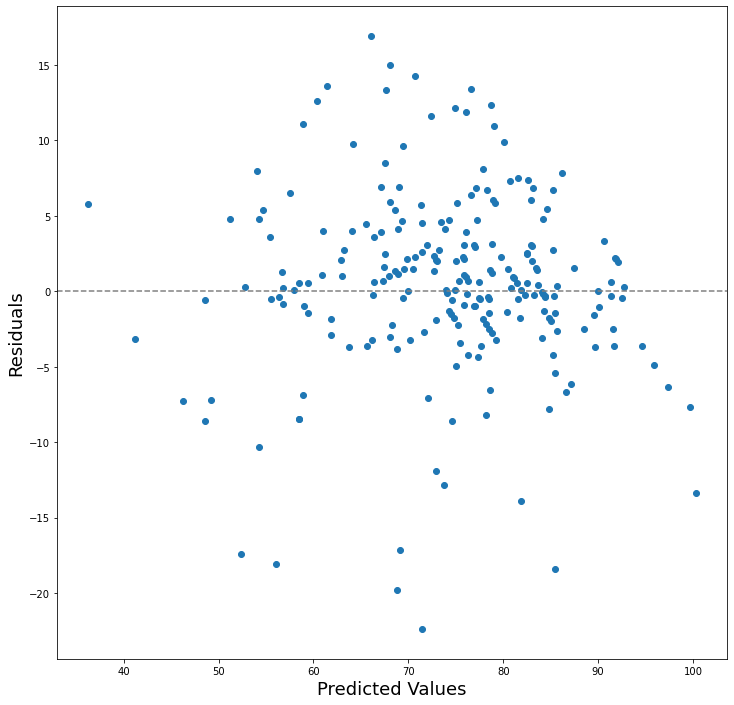

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.78801440500139
4.258877702721786


6.065312391377825

## Lasso Regression

In [25]:
lasso_model = LassoCV() 
lasso_model.fit(X_train_scale, y_train)

LassoCV()

In [26]:
list(zip(oscars_data.drop(columns='metacritic score'),lasso_model.coef_))

[('runtime (mins)', -0.0),
 ('budget', -0.3749865877228522),
 ('Total_Noms', 1.7339474608868772),
 ('Avg_Award_Score', 0.0264062272455656),
 ('Awards_Best Actor in a Leading Role', 0.0),
 ('Awards_Best Actor in a Supporting Role', 0.0),
 ('Awards_Best Actress in a Leading Role', 0.0),
 ('Awards_Best Art Direction-Set Decoration', -0.03820567225277379),
 ('Awards_Best Cinematography', 0.0),
 ('Awards_Best Director', 0.0),
 ('Awards_Best Film Editing', -0.0),
 ('Awards_Best Motion Picture of the Year', -0.0),
 ('Awards_Best Picture', 0.25896024329181494),
 ('Awards_Best Sound', -0.0),
 ('Director_Avg_Score', 7.133479046648223),
 ('Total_Director_Movies', -0.0),
 ('Lead_Actor_Avg_Score', 4.82145556178549),
 ('Total_Movies_Lead_Actor', -0.0),
 ('Avg_Rating_by_Genre', 0.31206774957770145),
 ('Buena Vista Pictures', 0.0),
 ('Columbia Pictures', -0.0),
 ('Fox Searchlight Pictures', 0.0),
 ('Miramax', -0.0),
 ('Paramount Pictures', -0.0),
 ('Sony Pictures Classics', 0.0),
 ('Twentieth Century 

In [27]:
y_pred = lasso_model.predict(X_test_scale)

In [28]:
lasso_model.score(X_train_scale,y_train)

0.817360763968428

In [29]:
lasso_model.score(X_test_scale,y_test)

0.774024259066566

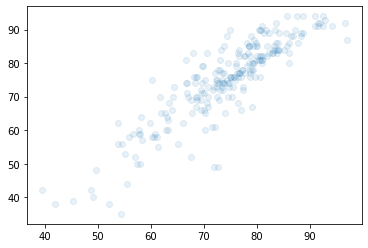

In [30]:
plt.scatter(y_pred, y_test, alpha=.1)
plt.plot(np.linspace(50,100,1), np.linspace(50,100,1))

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     50.23
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          2.16e-271
Time:                        12:21:06   Log-Likelihood:                -2834.6
No. Observations:                 908   AIC:                             5843.
Df Residuals:                     821   BIC:                             6262.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.192    372.754      0.000      71.040      71.792
x1            -0.2894      0.267     -1.085      0.278      -0.813       0.234
x2            -1.1055      0.291     -3.800      0.000      -1.677      -0.535
x3             2.6422      0.308      8.587      0.000       2.038       3.246
x4             0.6021      0.280      2.149      0.032       0.052       1.152
x5             0.2215      0.238      0.929      0.353      -0.246       0.689
x6             0.2935      0.221      1.330      0.184      -0.140       0.727
x7             0.3379      0.220      1.539      0.124      -0.093       0.769
x8            -0.3613      0.216     -1.671      0.095      -0.786       0.063
x9            -0.0609      0.203     -0.299      0.765      -0.460       0.338
x10            0.2025      0.210      0.966      0.334      -0.209       0.614
x11           -0.3748      0.227     -1.652      0.099      -0.820       0.071
x12           -0.4843      0.287     -1.685      0.092      -1.048       0.080
x13            0.5882      0.215      2.733      0.006       0.166       1.011
x14           -0.0876      0.208     -0.421      0.674      -0.496       0.321
x15            7.3010      0.313     23.343      0.000       6.687       7.915
x16           -0.4087      0.547     -0.747      0.456      -1.483       0.666
x17            4.6768      0.317     14.756      0.000       4.055       5.299
x18           -0.1701      0.439     -0.388      0.698      -1.031       0.691
x19            0.6786      0.325      2.088      0.037       0.041       1.316
x20           -0.0851      0.228     -0.373      0.709      -0.533       0.363
x21           -0.0531      0.222     -0.239      0.811      -0.489       0.382
x22            0.0731      0.205      0.356      0.722      -0.329       0.476
x23           -0.1563      0.213     -0.735      0.462      -0.574       0.261
x24            0.0929      0.231      0.401      0.688      -0.361       0.547
x25            0.3008      0.217      1.388      0.166      -0.125       0.726
x26            0.2579      0.218      1.181      0.238      -0.171       0.686
x27           -0.2319      0.223     -1.041      0.298      -0.669       0.205
x28            0.3113      0.235      1.323      0.186      -0.151       0.773
x29           -0.0959      0.234     -0.410      0.682      -0.555       0.363
x30            0.1116      1.086      0.103      0.918      -2.021       2.244
x31           -0.4917      0.810     -0.607      0.544      -2.081       1.098
x32           -0.2770      0.806     -0.344      0.731      -1.860       1.306
x33           -0.8045      1.119     -0.719      0.472      -3.001       1.392
x34           -0.5809      1.159     -0.501      0.616      -2.855       1.693
x35           -0.7482      0.860     -0.870      0.385      -2.436       0.940
x3

Text(0, 0.5, 'Residuals')

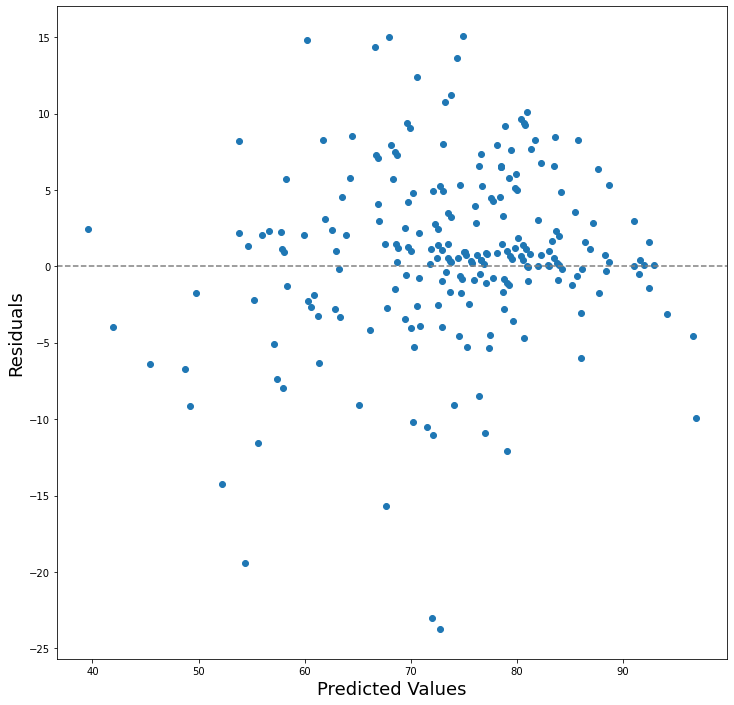

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

In [33]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

34.8515372621112
4.154834450507392


5.903519057486916

## Try Ridge regression

In [34]:
rm = RidgeCV() 
rm.fit(X_train_scale, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [35]:
list(zip(oscars_data.drop(columns='metacritic score'),rm.coef_))

[('runtime (mins)', -0.28032637051411413),
 ('budget', -1.0801891499148928),
 ('Total_Noms', 2.573193559317982),
 ('Avg_Award_Score', 0.623498164795306),
 ('Awards_Best Actor in a Leading Role', 0.24474963191455967),
 ('Awards_Best Actor in a Supporting Role', 0.309787776060805),
 ('Awards_Best Actress in a Leading Role', 0.34147496174123515),
 ('Awards_Best Art Direction-Set Decoration', -0.3506062689099778),
 ('Awards_Best Cinematography', -0.041799866181015055),
 ('Awards_Best Director', 0.2004358776278785),
 ('Awards_Best Film Editing', -0.37423310765476536),
 ('Awards_Best Motion Picture of the Year', -0.43288756022113795),
 ('Awards_Best Picture', 0.5946326183898307),
 ('Awards_Best Sound', -0.09840617100269222),
 ('Director_Avg_Score', 7.174248235877856),
 ('Total_Director_Movies', -0.3102038514048262),
 ('Lead_Actor_Avg_Score', 4.694765444382194),
 ('Total_Movies_Lead_Actor', -0.17288308972375432),
 ('Avg_Rating_by_Genre', 0.6924792759935077),
 ('Buena Vista Pictures', -0.08713

Text(0, 0.5, 'Residuals')

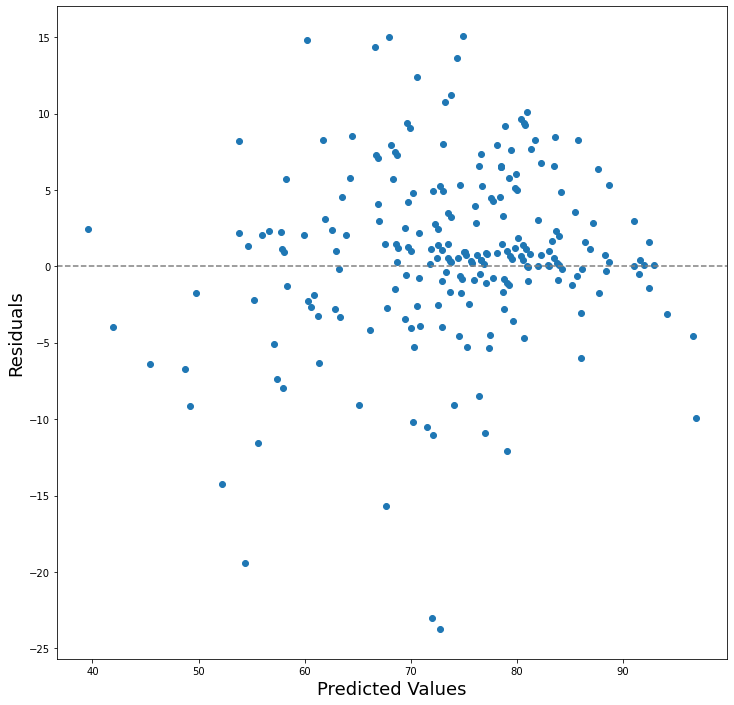

In [36]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

## Try lasso polynomial regression

In [37]:
m = LassoCV()
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)
s = StandardScaler(with_mean=False)
X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.75179856199884, tolerance: 13.531473829201103
  model = cd_fast.enet_coordinate_descent(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.439066956922034, tolerance: 14.221202892561982
  model = cd_fast.enet_coordinate_descent(
/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.72964671382442, tolerance: 14.221202892561982
  model = cd_fast.enet_coordinate_descent(
/Users/sibongiletoure

0.8305955392999578

## Retry Linear Model

In [38]:
X = oscars_data.drop(columns = ['R','Unrated','G','PG-13','PG','Winter','Fall','Summer','Spring','metacritic score'])
y = oscars_data['metacritic score']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [40]:
lm = LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [41]:
y_pred = lm.predict(X_test_scale)

In [42]:
lm.score(X_train_scale,y_train)

0.8402927501918056

In [43]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

36.78801440500139
4.258877702721786


6.065312391377825

Text(0, 0.5, 'Residuals')

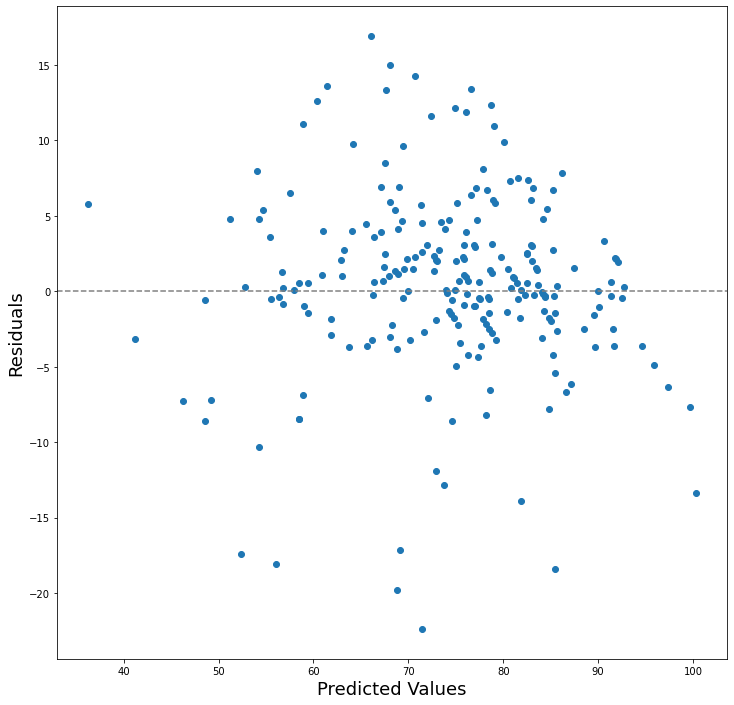

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(12,12))
plt.scatter(y_pred,residuals)

plt.axhline(0,linestyle="--",color='gray')
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

<AxesSubplot:ylabel='metacritic score'>

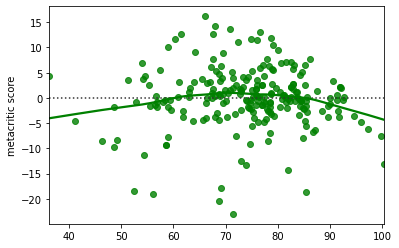

In [45]:
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")

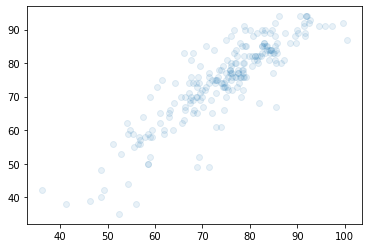

In [46]:
plt.scatter(y_pred, y_test, alpha=.1)
plt.plot(np.linspace(50,100,1), np.linspace(50,100,1))

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_scale))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     50.23
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          2.16e-271
Time:                        12:24:38   Log-Likelihood:                -2834.6
No. Observations:                 908   AIC:                             5843.
Df Residuals:                     821   BIC:                             6262.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4163      0.192    372.754      0.000      71.040      71.792
x1            -0.2894      0.267     -1.085      0.278      -0.813       0.234
x2            -1.1055      0.291     -3.800      0.000      -1.677      -0.535
x3             2.6422      0.308      8.587      0.000       2.038       3.246
x4             0.6021      0.280      2.149      0.032       0.052       1.152
x5             0.2215      0.238      0.929      0.353      -0.246       0.689
x6             0.2935      0.221      1.330      0.184      -0.140       0.727
x7             0.3379      0.220      1.539      0.124      -0.093       0.769
x8            -0.3613      0.216     -1.671      0.095      -0.786       0.063
x9            -0.0609      0.203     -0.299      0.765      -0.460       0.338
x10            0.2025      0.210      0.966      0.334      -0.209       0.614
x11           -0.3748      0.227     -1.652      0.099      -0.820       0.071
x12           -0.4843      0.287     -1.685      0.092      -1.048       0.080
x13            0.5882      0.215      2.733      0.006       0.166       1.011
x14           -0.0876      0.208     -0.421      0.674      -0.496       0.321
x15            7.3010      0.313     23.343      0.000       6.687       7.915
x16           -0.4087      0.547     -0.747      0.456      -1.483       0.666
x17            4.6768      0.317     14.756      0.000       4.055       5.299
x18           -0.1701      0.439     -0.388      0.698      -1.031       0.691
x19            0.6786      0.325      2.088      0.037       0.041       1.316
x20           -0.0851      0.228     -0.373      0.709      -0.533       0.363
x21           -0.0531      0.222     -0.239      0.811      -0.489       0.382
x22            0.0731      0.205      0.356      0.722      -0.329       0.476
x23           -0.1563      0.213     -0.735      0.462      -0.574       0.261
x24            0.0929      0.231      0.401      0.688      -0.361       0.547
x25            0.3008      0.217      1.388      0.166      -0.125       0.726
x26            0.2579      0.218      1.181      0.238      -0.171       0.686
x27           -0.2319      0.223     -1.041      0.298      -0.669       0.205
x28            0.3113      0.235      1.323      0.186      -0.151       0.773
x29           -0.0959      0.234     -0.410      0.682      -0.555       0.363
x30            0.1116      1.086      0.103      0.918      -2.021       2.244
x31           -0.4917      0.810     -0.607      0.544      -2.081       1.098
x32           -0.2770      0.806     -0.344      0.731      -1.860       1.306
x33           -0.8045      1.119     -0.719      0.472      -3.001       1.392
x34           -0.5809      1.159     -0.501      0.616      -2.855       1.693
x35           -0.7482      0.860     -0.870      0.385      -2.436       0.940
x3